## PJ 01 Analyzing if students who have taken AP Computer Science Principles have a better understanding of the material

## My Hypothesis is that the students who have taken AP Computer Science Principles have a better understanding of the material than students who have not taken AP Computer Science Principles.

In [ ]:
  %reload_ext autoreload
  %autoreload 2

My first step will be reading and converting the csv into a column oriented table.

In [ ]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)
columns

Next I will select the columns in the data set that have the value of if the student has taken AP Computer Science Principles and the column on their rating of their own understanding. 

In [ ]:
from data_utils import head, select

subset: dict[str, list[str]] = select(columns, ["AP_Principles", "understanding"])
head(subset, 5)

Next I will write a piece of code that will create two different lists. One list will have the understanding values for students who have taken AP Computer Science Principles and the other will be the ratings of students who have not. 

In [72]:
taken_csp: list[int] = []
not_taken_csp: list[int] =[]
i: int = 0
for key in subset['AP_Principles']:
    if key == "Yes":
        taken_csp.append(int(subset['understanding'][i]))
    elif key == "No":
        not_taken_csp.append(int(subset['understanding'][i]))
    i+=1
print(taken_csp)
print(not_taken_csp)


[6, 5, 6, 4, 5, 4, 5, 3, 5, 7, 5, 5, 6, 7, 7, 6, 6, 6, 7, 7, 6, 3, 5, 5, 7, 7, 6, 4, 5, 7, 5, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 2, 5, 2, 6, 4]
[5, 6, 5, 6, 4, 6, 7, 5, 5, 5, 3, 7, 7, 7, 7, 6, 6, 5, 6, 6, 6, 7, 4, 6, 6, 5, 7, 6, 5, 6, 6, 7, 5, 6, 3, 5, 6, 7, 5, 5, 7, 5, 6, 7, 7, 6, 6, 5, 7, 4, 7, 5, 5, 6, 7, 5, 6, 7, 4, 7, 4, 7, 5, 5, 6, 4, 3, 5, 5, 5, 5, 5, 6, 7, 6, 5, 5, 7, 3, 3, 7, 3, 3, 4, 4, 4, 6, 6, 5, 6, 4, 4, 4, 2, 6, 4, 2, 5, 5, 5, 5, 5, 6, 7, 4, 4, 2, 3, 4, 6, 5, 5, 4, 6, 4, 6, 6, 4, 6, 6, 2, 3, 3, 5]


Now I will count the frequency of each number in order to graph this. 

In [ ]:
from data_utils import count

taken_csp_frequency = count(taken_csp)
not_taken_csp_frequency = count(not_taken_csp)
print(taken_csp_frequency)
not_taken_csp_frequency


This will be the first visual that I will use to show the distribution in the rating for the people who have taken AP Computer Science Principles.

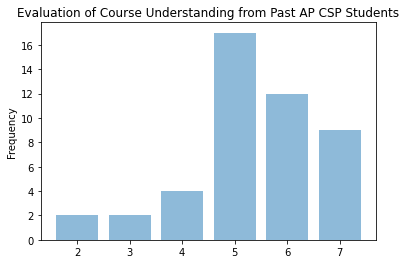

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5]  # the order the labels will be arranged in bar chart

vals = [taken_csp_frequency[2], taken_csp_frequency[3], taken_csp_frequency[4], taken_csp_frequency[5], taken_csp_frequency[6], taken_csp_frequency[7]]

plt.bar(y_pos, vals, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Frequency')
plt.title('Evaluation of Course Understanding from Past AP CSP Students')

plt.show()

This will be the first visual that I will use to show the distribution in the rating for  the people who have not taken AP Computer Science Principles.

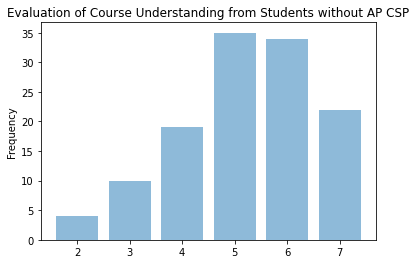

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5]  # the order the labels will be arranged in bar chart

vals = [not_taken_csp_frequency[2], not_taken_csp_frequency[3], not_taken_csp_frequency[4], not_taken_csp_frequency[5], not_taken_csp_frequency[6], not_taken_csp_frequency[7]]

plt.bar(y_pos, vals, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Frequency')
plt.title('Evaluation of Course Understanding from Students without AP CSP')

plt.show()

In order to see the students who have had mastery I will use the rating values that are equal to and greater than 5. This next function will use all of the values in the two previous lists and create a new list that includes all of the values that are greater than 5.

In [ ]:
def concept_understanding(input_list: list[int]) -> list[int]:
    """This function returns the  values that are greater than 5 in the list provided."""
    i: int = 2
    understanding_list: list[int] = []
    while i < len(input_list):
        if (input_list[i] >= 5):
            understanding_list.append(input_list[i])
        i += 1
    return understanding_list

In this piece, I call the function over the two lists that are have the rating for each of the students who had and had not taken AP CSP.

In [ ]:
concept_understanding(not_taken_csp)
concept_understanding(taken_csp)

In order to show a comparsion, I will show the percent of students who have shown mastery by creating a new variable from dividing the amount of students who have shown mastery from the function above by the total amount of ratings that are given for each group. I will then create a visual that is a bar chart for each of these percentages. 

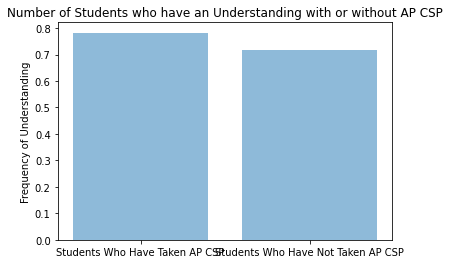

In [71]:
from statistics import mean
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['Students Who Have Taken AP CSP', 'Students Who Have Not Taken AP CSP']
y_pos = [0, 1]  # the order the labels will be arranged in bar chart
final_csp: float = (len(concept_understanding(taken_csp)))/(len(taken_csp))
final_not: float = (len(concept_understanding(not_taken_csp)))/(len(not_taken_csp))

vals = final_csp, final_not

plt.bar(y_pos, vals, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Frequency of Understanding')
plt.title('Percentage of Understanding in students with or without AP CSP')

plt.show()

## Conclusion
In my analysis I looked at the frequency of students and their rating of understanding within the Comp 110 class based on if they had previously taken the AP Computer Science Principles class. To begin, I wanted to find the rating that each student gave. I complied these into seperate lists based on the two groups of have taken the class and have not. Next I found the frequency of each of the ratings. However, I found that there was a greater frequency in the group that had not taken AP CSP becuase of the fact that there was a much larger amount of students who had not taken AP CSP. To develop a comparable statistic, I decided that the percentage of mastery over the total amount of students would be a better representation. To do this, I made a sepearte list that showed values of mastery. For the purpsoes of this analysis, I used values that were greater than or equal to 5. I then divided this amount by the amount of students who had answered. I found that the students who had taken AP CSP had a greater percent mastery than those students who had not. This did support my hyptohesis that the students who have taken AP Computer Science Principles have a better understanding of the material than students who have not taken AP Computer Science Principles. Although, the ratings were close ranging from close to 79% for studetns who have taken AP CSP to close to 71% for students who have not. This could come from a better previous understanding of the content. 